<a href="https://colab.research.google.com/github/kareemelfatairy/FatwaBot/blob/master/RADTorch_playground%20kareem%20version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADTorch Playground

This notebook provides a step by step tutorial on examples using RADTorch Pipelines

## Install RADTorch

In [0]:
## install latest nightly release
!pip3 install https://repo.radtorch.com/archive/v0.1.2-beta-3.zip -q


     \ 5.0MB 2.8MB/s
     |████████████████████████████████| 35.3MB 94kB/s 


## Import Demo Data


In this tutorial We will use the chest xray data provided by Daniel Kermany, Kang Zhang, Michael Goldbaum

Dataset: Labeled Optical Coherence Tomography (OCT) and Chest X-Ray Images for Classification

File: ChestXRay2017

File Size: 1.2 GB

DOI: http://dx.doi.org/10.17632/rscbjbr9sj.2#file-41d542e7-7f91-47f6-9ff2-dd8e5a5a7861

In [0]:
!rm -r /content/sample_data/
!wget https://data.mendeley.com/datasets/rscbjbr9sj/2/files/f12eaf6d-6023-432f-acc9-80c9d7393433/ChestXRay2017.zip -q
!unzip -q /content/ChestXRay2017.zip
!find . -name "*.DS_Store" -type f -delete

## Image Classification Pipeline

In this tutorial, we will create a simple image classification pipeline to classify normal vs pneumonia from our dataset.

To make the classification problem more interesting, we will divide the dataset further into normal, bacterial pneumonia and viral pneumonia using keywords in file names.


In [0]:
from radtorch import datautils, pipeline
import pandas as pd

In [0]:
#Creating list of files for each class
pneumonia_file_list = datautils.list_of_files('/content/chest_xray/train/PNEUMONIA/')
bacterial_list = [i for i in pneumonia_file_list if 'bacteria' in i]
viral_list = [i for i in pneumonia_file_list if 'virus' in i]
normal_list = datautils.list_of_files('/content/chest_xray/train/NORMAL/')

#For demo we will use only 400 of each class.
subset = 400

#Create Dataframe of image paths and image labels.
data_sub = bacterial_list[:subset]+viral_list[:subset]+normal_list[:subset]
label_sub = ['bacteria']*subset+['virus']*subset+['normal']*subset

data_label_df = pd.DataFrame(list(zip(data_sub, label_sub)), columns=['IMAGE_PATH', 'IMAGE_LABEL'])
data_label_df = data_label_df.sample(frac=1).reset_index(drop=True) #shuffle dataset
data_label_df.head()

,IMAGE_PATH,IMAGE_LABEL
0,/content/chest_xray/train/NORMAL/IM-0391-0001....,normal
1,/content/chest_xray/train/PNEUMONIA/person1253...,bacteria
2,/content/chest_xray/train/NORMAL/NORMAL2-IM-12...,normal
3,/content/chest_xray/train/PNEUMONIA/person470_...,bacteria
4,/content/chest_xray/train/PNEUMONIA/person1376...,virus


In [0]:
#Create the image classification pipeline object
clf = pipeline.Image_Classification(data_directory='/content/chest_xray/train/',
                                    model_arch='resnet152', 
                                    is_dicom=False, 
                                    label_from_table=True, 
                                    table_source=data_label_df, 
                                    valid_percent=0.2, 
                                    test_percent=0.2, train_epochs=20)

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /root/.cache/torch/checkpoints/resnet152-b121ed2d.pth


In [0]:
#Display dataset information
clf.dataset_info()

,Classes,Class Idx,Number of Instances
0,bacteria,0,400
1,normal,1,400
2,virus,2,400
3,Total Instances,,1200
4,Train Dataset Size,,720
5,Valid Dataset Size,,240
6,Test Dataset Size,,240


In [0]:
#Display dataset information as graph
clf.dataset_info(plot=True)

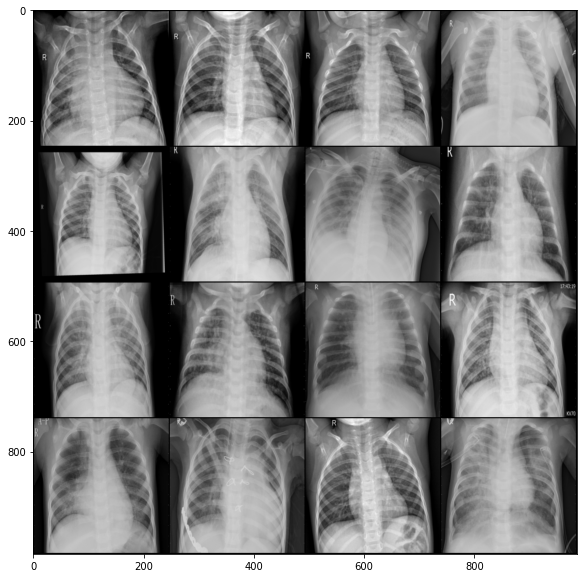

In [0]:
#Display sample images from dataset
clf.sample()

In [0]:
#Train Image Classification Pipeline
clf.run()

random seed set successfully
Starting training at 2020-03-17 18:49:11.061727


Epoch : 000/20 : [Training: Loss: 0.6051, Accuracy: 74.1667%]  [Validation : Loss : 0.4443, Accuracy: 80.4167%] [Time: 34.4195s]
Epoch : 001/20 : [Training: Loss: 0.3628, Accuracy: 84.8611%]  [Validation : Loss : 0.5744, Accuracy: 79.1667%] [Time: 34.1063s]
Epoch : 002/20 : [Training: Loss: 0.1903, Accuracy: 94.0278%]  [Validation : Loss : 0.8966, Accuracy: 73.7500%] [Time: 34.1753s]
Epoch : 003/20 : [Training: Loss: 0.1463, Accuracy: 94.8611%]  [Validation : Loss : 0.8408, Accuracy: 74.5833%] [Time: 34.0880s]
Epoch : 004/20 : [Training: Loss: 0.1099, Accuracy: 95.9722%]  [Validation : Loss : 0.6557, Accuracy: 80.8333%] [Time: 33.8810s]
Epoch : 005/20 : [Training: Loss: 0.0772, Accuracy: 97.5000%]  [Validation : Loss : 0.7511, Accuracy: 75.0000%] [Time: 34.2920s]
Epoch : 006/20 : [Training: Loss: 0.0537, Accuracy: 98.4722%]  [Validation : Loss : 0.7559, Accuracy: 83.3333%] [Time: 34.5707s]
Epoch : 007/20 : [Training: Loss: 0.0394, Accuracy: 99.0278%]  [Validation : Loss : 0.6620, Accur

In [0]:
#Show training metrics
clf.metrics()

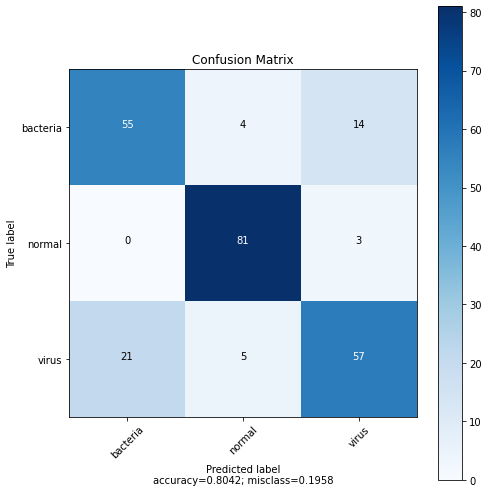

In [0]:
# Display confusion matrix
clf.confusion_matrix()

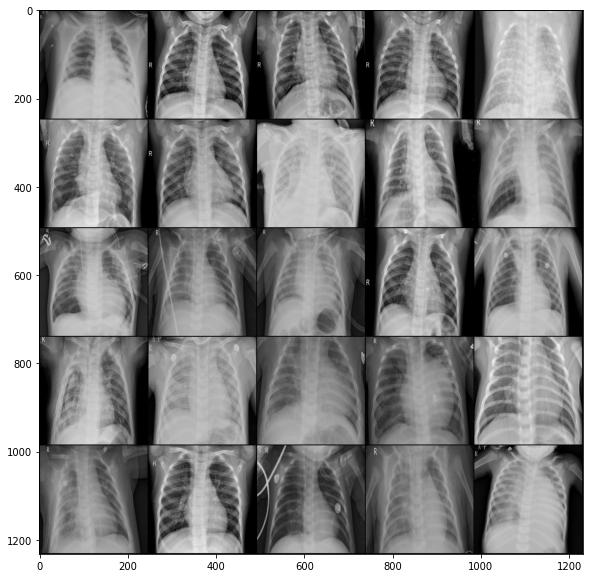

In [0]:
# Display sample of misclassifed images
X = clf.misclassified(num_of_images=25, figure_size=(10,10))

In [0]:
# Display table of misclassifed images
clf.misclassified_instances.head()

,image_path,true_label,predicted_label
0,/content/chest_xray/train/PNEUMONIA/person1883...,0,2
1,/content/chest_xray/train/PNEUMONIA/person1365...,0,2
2,/content/chest_xray/train/PNEUMONIA/person320_...,2,0
3,/content/chest_xray/train/PNEUMONIA/person1409...,0,2
4,/content/chest_xray/train/NORMAL/NORMAL2-IM-10...,1,2


In [0]:
# Display label to idx dictionary used by pipeline
clf.data_set.class_to_idx

{'bacteria': 0, 'normal': 1, 'virus': 2}

In [0]:
# Perform inference on a single outside image
clf.inference(test_img_path= '/content/chest_xray/test/PNEUMONIA/person109_bacteria_526.jpeg', all_predictions=True)

,label_idx,prediction_percentage
0,0,99.786794
1,1,0.000026
2,2,0.213176


In [0]:
# Export trained model
clf.export_model('/content/trained_model.pth')

Trained classifier exported successfully.


In [0]:
# Export whole Image Classification Pipeline
clf.export('/content/pipeline.dump')

## Feature Extraction Pipeline

In this tutorial, we will create an feature extraction pipeline. 

We'll use a native ResNet152 model trained on ImageNet dataset and extract the features from our a new dataset (in the test folder).


In [0]:
from radtorch import pipeline, datautils
import pandas as pd

In [0]:
#Creating list of files for each class
pneumonia_file_list = datautils.list_of_files('/content/chest_xray/test/PNEUMONIA/')
bacterial_list = [i for i in pneumonia_file_list if 'bacteria' in i]
viral_list = [i for i in pneumonia_file_list if 'virus' in i]
normal_list = datautils.list_of_files('/content/chest_xray/test/NORMAL/')

#Create Dataframe of image paths and image labels.
data_sub = bacterial_list+viral_list+normal_list
label_sub = ['bacteria']*len(bacterial_list)+['virus']*len(viral_list)+['normal']*len(normal_list)

data_label_df = pd.DataFrame(list(zip(data_sub, label_sub)), columns=['IMAGE_PATH', 'IMAGE_LABEL'])
data_label_df = data_label_df.sample(frac=1).reset_index(drop=True) #shuffle dataset
data_label_df.head()

,IMAGE_PATH,IMAGE_LABEL
0,/content/chest_xray/test/NORMAL/NORMAL2-IM-032...,normal
1,/content/chest_xray/test/PNEUMONIA/person161_b...,bacteria
2,/content/chest_xray/test/NORMAL/IM-0065-0001.jpeg,normal
3,/content/chest_xray/test/PNEUMONIA/person159_b...,bacteria
4,/content/chest_xray/test/PNEUMONIA/person33_vi...,virus


In [0]:
#Create Feature Extraction Pipeline
ext = pipeline.Feature_Extraction(data_directory='/content/chest_xray/test/',
                                  is_dicom=False, 
                                  model_arch='resnet152', 
                                  label_from_table=True, 
                                  table_source=data_label_df)

In [0]:
ext.dataset_info()

,Classes,Class Idx,Number of Instances
0,bacteria,0,242
1,normal,1,234
2,virus,2,148
3,Total Instances,,624


labels: tensor([0, 1, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 2, 0, 1, 1])


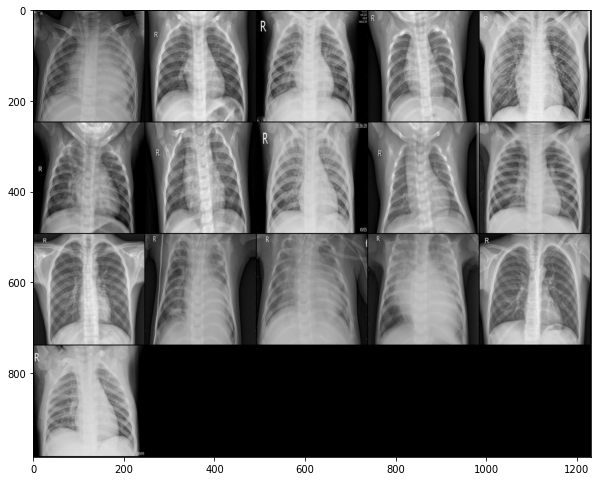

In [0]:
#Display Sample images
ext.sample()

In [0]:
#Display class to idx mapping
ext.data_set.class_to_idx

{'bacteria': 0, 'normal': 1, 'virus': 2}

In [0]:
# Display number of features that will be extracted (model architecture dependent)
ext.num_features()

2048

In [0]:
#Run Feature Extraction Pipeline
ext.run(verbose=False)


 Features extracted successfully.


In [0]:
#Display features generated
ext.feature_table

,img_path,label_idx,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,...,f_2008,f_2009,f_2010,f_2011,f_2012,f_2013,f_2014,f_2015,f_2016,f_2017,f_2018,f_2019,f_2020,f_2021,f_2022,f_2023,f_2024,f_2025,f_2026,f_2027,f_2028,f_2029,f_2030,f_2031,f_2032,f_2033,f_2034,f_2035,f_2036,f_2037,f_2038,f_2039,f_2040,f_2041,f_2042,f_2043,f_2044,f_2045,f_2046,f_2047
0,/content/chest_xray/test/NORMAL/NORMAL2-IM-036...,1,0.598366,0.622173,0.039892,0.969473,1.331241,0.306371,0.428572,0.255429,0.129714,0.711852,0.231114,0.620953,0.234614,0.452913,1.763351,0.056401,0.481656,0.379935,0.779348,0.208116,0.185207,0.571385,0.501221,0.377583,0.210961,0.661907,0.344129,0.118060,0.868276,0.322306,0.068300,0.316159,0.546138,0.767874,1.020036,0.713450,0.074249,0.030862,...,2.036815,0.258469,1.611996,0.137673,0.290332,0.024836,0.318025,0.396374,0.604868,0.395780,0.024709,0.084936,0.451899,0.792830,0.106162,1.043362,0.252287,0.369014,0.868456,0.338007,0.566230,0.489052,0.207512,0.156349,0.456827,0.075227,0.611759,0.325434,0.860822,0.024928,0.061821,1.073559,0.337612,0.498945,1.694452,0.742028,1.919524,0.276623,0.398897,0.322385
1,/content/chest_xray/test/PNEUMONIA/person155_b...,0,0.587589,1.210916,0.095760,1.081335,1.114658,0.539595,0.943135,0.270887,0.005037,0.222574,0.339127,0.306111,0.096682,0.325581,0.873332,0.003154,0.369760,0.486241,0.327419,0.260927,0.188245,0.639089,0.297198,0.293144,0.148417,0.660799,0.203718,0.069715,0.420641,0.177478,0.034454,0.233810,0.824386,0.421142,0.224848,0.301034,0.048016,0.112864,...,0.484443,0.296665,0.621481,0.121235,0.471834,0.101353,0.430739,0.598659,0.363032,0.432132,0.027183,0.027718,0.080276,0.227851,0.438963,1.555187,0.222287,0.147511,0.751428,0.777451,0.553814,0.323948,0.053822,0.052082,0.941657,0.204837,0.528703,0.211343,0.829826,0.006520,0.168933,0.479066,0.541069,0.297560,1.194639,1.058156,0.854779,0.040775,0.432621,0.211596
2,/content/chest_xray/test/NORMAL/NORMAL2-IM-032...,1,0.372477,1.045201,0.029017,0.358964,1.879102,0.329086,0.376978,0.085026,0.089643,0.527536,0.503615,1.273389,0.045647,0.405585,1.243733,0.096162,0.393480,0.277552,0.836144,0.314496,0.165592,0.777790,0.453122,0.403575,0.350229,1.084434,0.324930,0.167079,0.766022,0.345102,0.060270,0.280084,0.672456,1.071407,0.915503,0.484562,0.056049,0.027151,...,2.126482,0.260689,1.399121,0.054626,0.610711,0.105711,0.640610,0.745696,0.725592,0.651445,0.003022,0.013010,0.362259,0.302457,0.231129,1.546598,0.349380,0.333375,0.588896,0.453653,0.809107,0.597957,0.315070,0.215372,0.762766,0.214896,1.014241,0.108449,0.775228,0.035779,0.107251,1.267431,0.786133,0.604460,1.175864,0.868000,0.759951,0.137926,0.695616,0.414819
3,/content/chest_xray/test/NORMAL/NORMAL2-IM-007...,1,0.356610,0.953180,0.047433,0.708114,1.540206,1.066260,0.948468,0.120377,0.003190,0.552297,0.192119,0.734034,0.064689,0.885604,0.975794,0.147820,0.336075,0.429508,0.672085,0.279566,0.110204,0.611704,0.323714,0.239085,0.248492,0.222177,0.165502,0.129379,1.659970,0.101822,0.085101,0.314484,0.323820,0.294330,0.780181,0.415488,0.048557,0.131909,...,1.492987,0.128491,1.132015,0.162085,0.687216,0.052395,0.612025,1.059103,0.466159,0.438365,0.000000,0.056452,0.433824,0.441417,0.365122,0.907472,0.330443,0.254416,0.542380,0.672244,0.739070,0.733201,0.344318,0.149474,1.310207,0.123132,0.757474,0.353646,0.952476,0.055483,0.181764,0.526999,0.391098,0.420311,1.852891,1.177656,1.241426,0.099425,0.718421,0.476927
4,/content/chest_xray/test/PNEUMONIA/person15_vi...,2,0.459466,0.550711,0.115171,0.391854,1.319792,0.498038,0.319511,0.036689,0.098780,0.573394,0.456902,0.979516,0.182482,0.811765,1.284882,0.037049,0.368661,0.083300,0.786785,0.215884,0.094780,0.500001,0.651303,0.545054,0.188408,0.759423,0.648100,0.054823,0.562782,0.229971,0.048060,0.178779,0.325177,0.863343,1.007362,0.342850,0.057339,0.031075,...,1.496926,0.364067,1.200247,0.019095,0.442627,0.036922,0.461466,0.708184,0.47

In [0]:
# Plot the extracted features per each class
ext.plot_extracted_features(num_features=150)

In [0]:
#Export Generated Features
ext.export_features('/content/features.csv')

Features exported to CSV successfully.
